In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='../COCO_dataset/val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)

In [3]:
# initialize D2S api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
# display D2S categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}'.format(', '.join(nms)))

#Multi Class #Parts dataset
mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part
COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [6]:
imgIds

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [7]:
imgId = coco.getImgIds(imgIds = [4])
img = coco.loadImgs(imgId)[0]

In [8]:
img

{'coco_url': '',
 'date_captured': '2020-07-14 09:59:34.190485',
 'file_name': '32.jpg',
 'flickr_url': '',
 'height': 1024,
 'id': 4,
 'license': 1,
 'width': 1024}

In [9]:
img_dir = "../COCO_dataset/img"

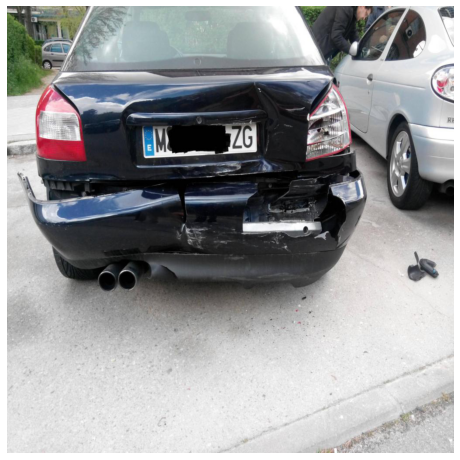

In [10]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

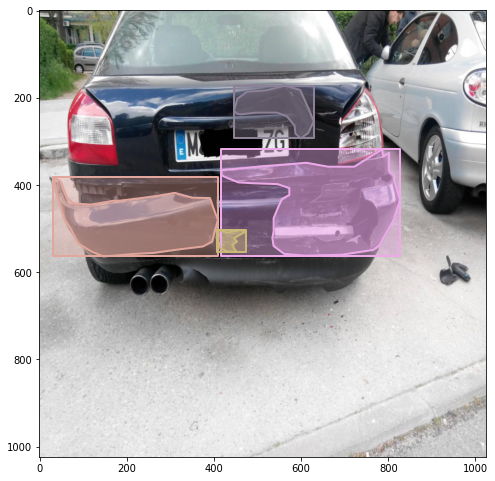

In [11]:
plt.imshow(I)
plt.axis('on')
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)
# plt.scatter([anns[0]["bbox"][0], anns[0]["bbox"][0] + anns[0]["bbox"][2]],[anns[0]["bbox"][1], anns[0]["bbox"][1] + anns[0]["bbox"][3]])
# plt.annotate("top left ({},{})".format(anns[0]["bbox"][0], anns[0]["bbox"][1]), (anns[0]["bbox"][0], anns[0]["bbox"][1]))
# plt.annotate("bottom right ({},{})".format(anns[0]["bbox"][0] + anns[0]["bbox"][2] , anns[0]["bbox"][1] + anns[0]["bbox"][3]), (anns[0]["bbox"][0] + anns[0]["bbox"][2] , anns[0]["bbox"][1] + anns[0]["bbox"][3]))
coco.showAnns(anns, draw_bbox=True )

### Multi Class Car Parts

In [12]:
# get all images containing given categories, select one at random
catIds = mul_coco.getCatIds(catNms=['headlamp']);
imgIds = mul_coco.getImgIds(catIds=catIds );
imgId = mul_coco.getImgIds(imgIds = [4])
img = mul_coco.loadImgs(imgId)[0]

In [13]:
img

{'coco_url': '',
 'date_captured': '2020-07-14 09:59:34.190485',
 'file_name': '32.jpg',
 'flickr_url': '',
 'height': 1024,
 'id': 4,
 'license': 1,
 'width': 1024}

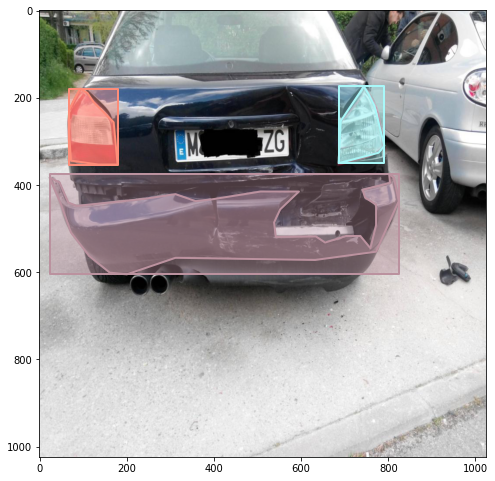

In [14]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = mul_coco.loadAnns(annIds)
mul_coco.showAnns(anns, draw_bbox=True )